<a href="https://colab.research.google.com/github/cm-int/machine-learning-fundamentals/blob/main/module_3/Democode/Mod_3_Lesson_1_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparing Samples

In this demonstration, you’ll see how to compare samples against a population. You'll see how to examine the entropy and KL divergence of the distributions. Then you'll perform comparisons using measures of central tendency and dispersion and see how to locate samples that are suspect. 

This demonstration uses the Bank Marketing dataset.

This dataset is public available for research. The details are described in [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

# Examine the data

In [ ]:
# Upload the marketingdata.csv file

!wget 'https://raw.githubusercontent.com/cm-int/machine-learning-fundamentals/main/module_3/Democode/marketingdata.csv'

In [182]:
# Read the data from the CSV file
# This is our population from which we will draw samples

import numpy as np
import pandas as pd

marketing = pd.read_csv("marketingdata.csv", sep=';')
print(marketing)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [183]:
# Focus on the 'job' feature

job = marketing['job']
print(job)

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object


In [184]:
# Create a dataframe with a zero count for each job (this will be used later to handle missing probability values)

zero_dataframe = pd.DataFrame(data=[np.zeros(12)], columns=np.sort(job.unique()))
print(zero_dataframe)

   admin.  blue-collar  entrepreneur  housemaid  management  retired  \
0     0.0          0.0           0.0        0.0         0.0      0.0   

   self-employed  services  student  technician  unemployed  unknown  
0            0.0       0.0      0.0         0.0         0.0      0.0  


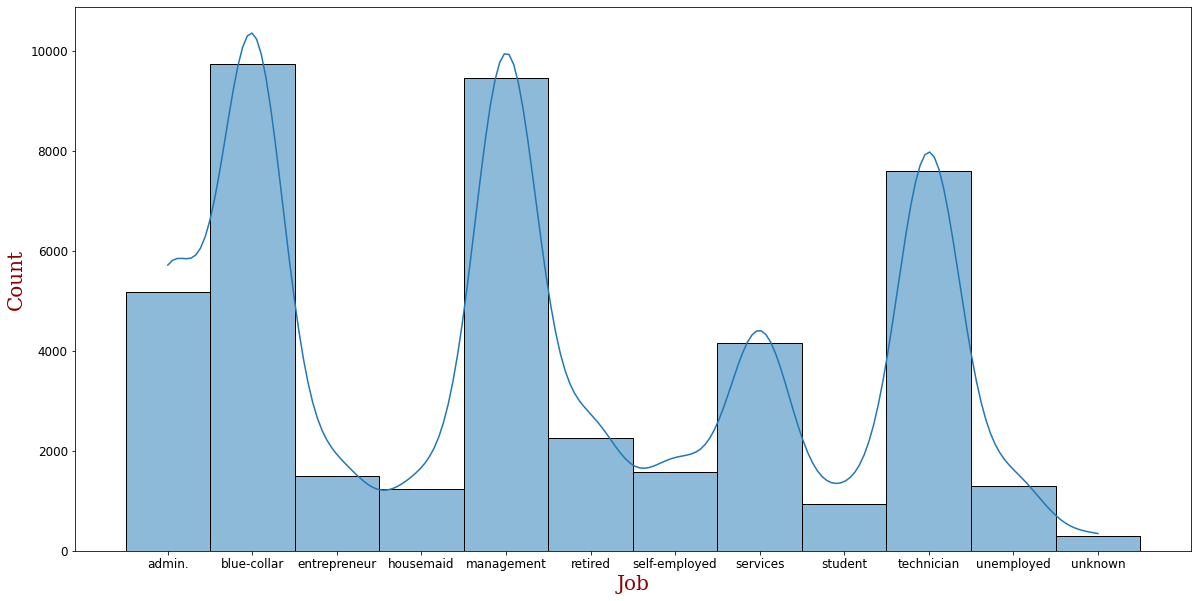

admin.           0.114375
blue-collar      0.215257
entrepreneur     0.032890
housemaid        0.027427
management       0.209197
retired          0.050076
self-employed    0.034925
services         0.091880
student          0.020747
technician       0.168034
unemployed       0.028820
unknown          0.006370
Name: 0, dtype: float64


In [185]:
# Draw a histogram to display the distribution of jobs from the population

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
f = sns.histplot(data=np.sort(job), kde=True)
f.set_xlabel('Job', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel("Count", fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

# Capture the probabilities for each job
pop_probs = [i.get_height()/len(job) for i in f.containers[0]]
pop_dataframe = pd.DataFrame(data=[pop_probs], columns=[t.get_text() for t in f.get_xticklabels()]).fillna(0).iloc[0]
print(pop_dataframe)

**Questions:**

What is the mode of this dataset?

*Answer: blue-collar*

What is the mean of this dataset?

*Answer: Calculating the mean of a categorical non-ordinal dataset is not meaningful.*

In [186]:
# Show counts and probabilities for each job category

total = len(job)
print(f'Total number of datapoints: {total}\n')

for j in np.sort(job.unique()):
  n = len(job[job == j])
  print(f'{j}: {n}, P(x={j}): {n/total}')

Total number of datapoints: 45211

admin.: 5171, P(x=admin.): 0.11437482028709828
blue-collar: 9732, P(x=blue-collar): 0.21525734887527373
entrepreneur: 1487, P(x=entrepreneur): 0.03289022582999712
housemaid: 1240, P(x=housemaid): 0.027426953617482472
management: 9458, P(x=management): 0.20919687686624935
retired: 2264, P(x=retired): 0.05007630886288735
self-employed: 1579, P(x=self-employed): 0.03492512884032647
services: 4154, P(x=services): 0.09188029461856628
student: 938, P(x=student): 0.02074716330096658
technician: 7597, P(x=technician): 0.16803432792904383
unemployed: 1303, P(x=unemployed): 0.028820419809338436
unknown: 288, P(x=unknown): 0.006370131162770122


In [187]:
# Retrieve some random samples from the population

from numpy import random

sample1 = np.random.choice(job, size=1000)
sample2 = np.random.choice(job, size=100)
sample3 = np.random.choice(job, size=10)

sortedjob = np.sort(job)

#idx = abs(np.random.laplace(777, 7777, 7777)).astype(int) % len(job)
idx = abs(np.random.normal(loc=15000, scale=5700, size=21000)).astype(int) % len(job)
sample4 = [sortedjob[j] for j in idx]

idx = abs(np.random.exponential(7000, 1000)).astype(int) % len(job)
sample5 = [sortedjob[j] for j in idx]

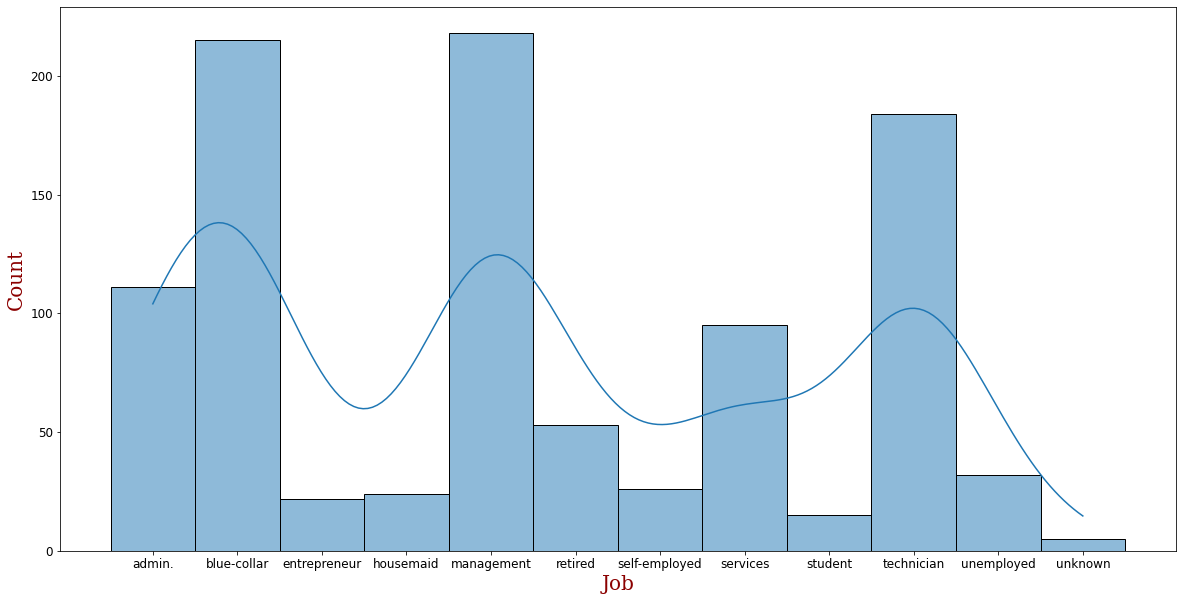

admin.           0.111
blue-collar      0.215
entrepreneur     0.022
housemaid        0.024
management       0.218
retired          0.053
self-employed    0.026
services         0.095
student          0.015
technician       0.184
unemployed       0.032
unknown          0.005
Name: 0, dtype: float64


In [188]:
# Draw a histogram to display the distribution of jobs in sample1

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
f = sns.histplot(data=np.sort(sample1), kde=True)
f.set_xlabel('Job', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel("Count", fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

# Capture the probabilities for each job in this sample
sample1_probs = [i.get_height()/len(sample1) for i in f.containers[0]]
sample1_dataframe = pd.DataFrame(data=[sample1_probs], columns=[t.get_text() for t in f.get_xticklabels()])

# Replace any NAs resulting from the merge with 10e-99 - a minutely small probability
# If you use zero, relative entropy compared to a finite value is infinity
sample1_dataframe = sample1_dataframe.merge(zero_dataframe, how = 'outer').fillna(10e-99).iloc[0] 
print(sample1_dataframe)

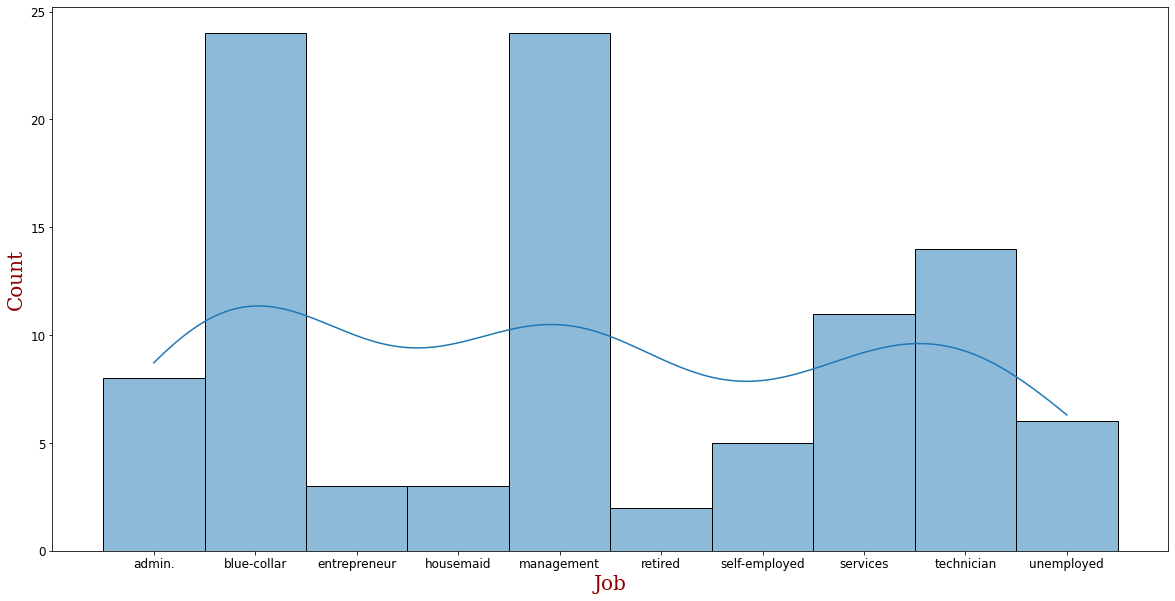

admin.           8.000000e-02
blue-collar      2.400000e-01
entrepreneur     3.000000e-02
housemaid        3.000000e-02
management       2.400000e-01
retired          2.000000e-02
self-employed    5.000000e-02
services         1.100000e-01
technician       1.400000e-01
unemployed       6.000000e-02
student          1.000000e-98
unknown          1.000000e-98
Name: 0, dtype: float64


In [189]:
# Draw a histogram to display the distribution of jobs in sample2

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
f = sns.histplot(data=np.sort(sample2), kde=True)
f.set_xlabel('Job', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel("Count", fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

# Capture the probabilities for each job in this sample
sample2_probs = [i.get_height()/len(sample2) for i in f.containers[0]]
sample2_dataframe = pd.DataFrame(data=[sample2_probs], columns=[t.get_text() for t in f.get_xticklabels()])
sample2_dataframe = sample2_dataframe.merge(zero_dataframe, how = 'outer').fillna(10e-99).iloc[0]
print(sample2_dataframe)

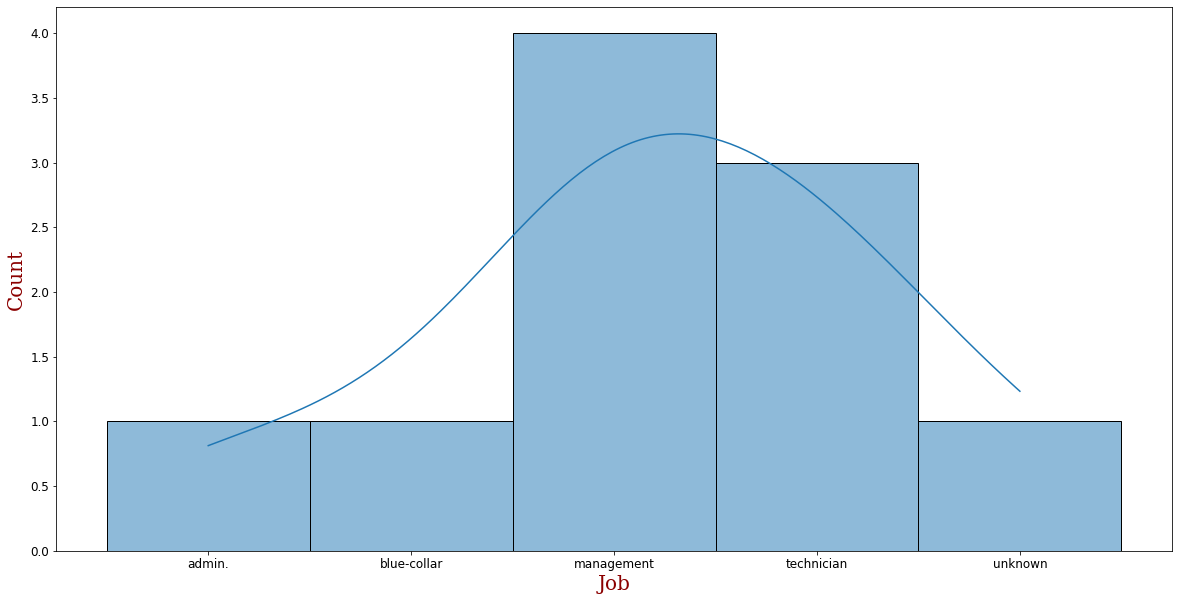

admin.           1.000000e-01
blue-collar      1.000000e-01
management       4.000000e-01
technician       3.000000e-01
unknown          1.000000e-01
entrepreneur     1.000000e-98
housemaid        1.000000e-98
retired          1.000000e-98
self-employed    1.000000e-98
services         1.000000e-98
student          1.000000e-98
unemployed       1.000000e-98
Name: 0, dtype: float64


In [190]:
# Draw a histogram to display the distribution of jobs in sample3

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
f = sns.histplot(data=np.sort(sample3), kde=True)
f.set_xlabel('Job', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel("Count", fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

# Capture the probabilities for each job in this sample
sample3_probs = [i.get_height()/len(sample3) for i in f.containers[0]]
sample3_dataframe = pd.DataFrame(data=[sample3_probs], columns=[t.get_text() for t in f.get_xticklabels()])
sample3_dataframe = sample3_dataframe.merge(zero_dataframe, how = 'outer').fillna(10e-99).iloc[0]
print(sample3_dataframe)

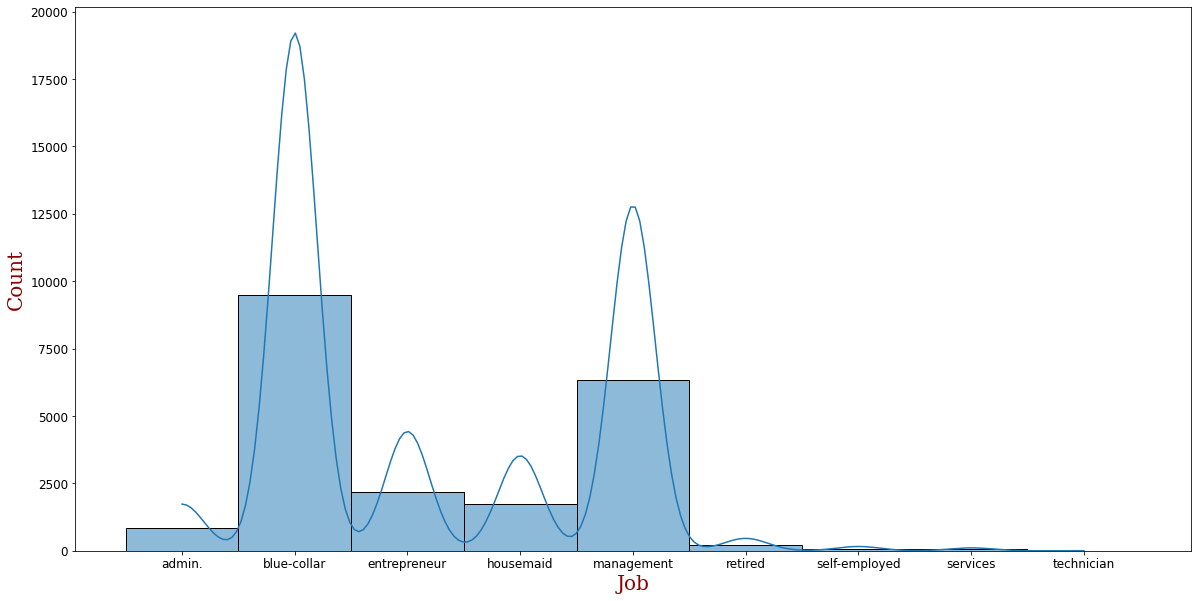

admin.           4.080952e-02
blue-collar      4.525714e-01
entrepreneur     1.043333e-01
housemaid        8.304762e-02
management       3.019524e-01
retired          1.085714e-02
self-employed    3.761905e-03
services         2.571429e-03
technician       9.523810e-05
student          1.000000e-98
unemployed       1.000000e-98
unknown          1.000000e-98
Name: 0, dtype: float64


In [191]:
# Draw a histogram to display the distribution of jobs in sample4

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
f = sns.histplot(data=np.sort(sample4), kde=True)
f.set_xlabel('Job', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel("Count", fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

# Capture the probabilities for each job in this sample
sample4_probs = [i.get_height()/len(sample4) for i in f.containers[0]]
sample4_dataframe = pd.DataFrame(data=[sample4_probs], columns=[t.get_text() for t in f.get_xticklabels()])
sample4_dataframe = sample4_dataframe.merge(zero_dataframe, how = 'outer').fillna(10e-99).iloc[0]
print(sample4_dataframe)

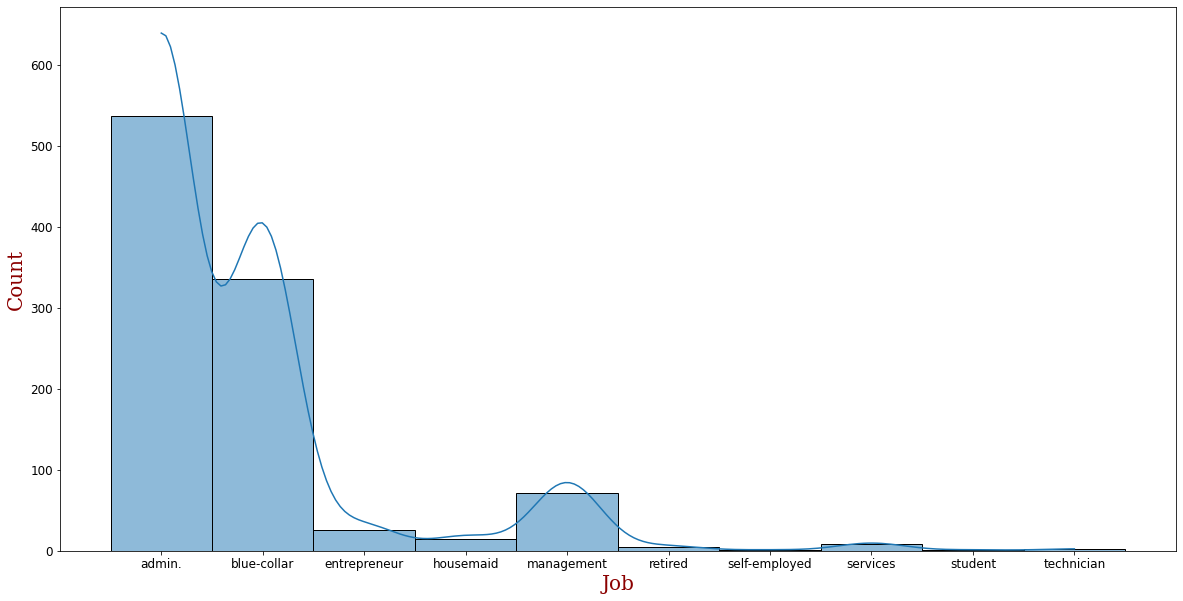

admin.           5.360000e-01
blue-collar      3.350000e-01
entrepreneur     2.600000e-02
housemaid        1.500000e-02
management       7.100000e-02
retired          5.000000e-03
self-employed    1.000000e-03
services         8.000000e-03
student          1.000000e-03
technician       2.000000e-03
unemployed       1.000000e-98
unknown          1.000000e-98
Name: 0, dtype: float64


In [192]:
# Draw a histogram to display the distribution of jobs in sample5

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
f = sns.histplot(data=np.sort(sample5), kde=True)
f.set_xlabel('Job', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel("Count", fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

# Capture the probabilities for each job in this sample
sample5_probs = [i.get_height()/len(sample5) for i in f.containers[0]]
sample5_dataframe = pd.DataFrame(data=[sample5_probs], columns=[t.get_text() for t in f.get_xticklabels()])
sample5_dataframe = sample5_dataframe.merge(zero_dataframe, how = 'outer').fillna(10e-99).iloc[0]
print(sample5_dataframe)

**Conclusion:**

Entropy and KL-divergence can give you an indication of whether your sampling is too small and/or skewed. The closer the entropy of a sample is to that of the population, and the smaller the KL-divergence, the better the sam:ple.

# How different are the samples from the population?

In [193]:
# Calculate the entropy of each sample

from scipy.stats import entropy

e_pop = entropy(pop_probs)
e_sample1 = entropy(sample1_probs)
e_sample2 = entropy(sample2_probs)
e_sample3 = entropy(sample3_probs)
e_sample4 = entropy(sample4_probs)
e_sample5 = entropy(sample5_probs)

print(f'Entropies.\nPopulation:{e_pop}\nSample1:{e_sample1}\nSample2:{e_sample2}\nSample3:{e_sample3}\nSample4:{e_sample4}\nSample5:{e_sample5}')

Entropies.
Population:2.11780930508139
Sample1:2.065340144021545
Sample2:2.01235537322606
Sample3:1.4184836619456564
Sample4:1.3797153586522635
Sample5:1.1376750899550359


In [194]:
# What is the relative entropy of sample1 to the population?
# The difference should be small because sample1 is a true random sample of 'reasonable' size compared to the population

import scipy.special as sp
import math

print(f'{sample1_dataframe}\n')
print(f'Relative entropy is {sum(sp.rel_entr(pop_dataframe, sample1_dataframe))} nats')

admin.           0.111
blue-collar      0.215
entrepreneur     0.022
housemaid        0.024
management       0.218
retired          0.053
self-employed    0.026
services         0.095
student          0.015
technician       0.184
unemployed       0.032
unknown          0.005
Name: 0, dtype: float64

Relative entropy is 0.006348594608009093 nats


In [195]:
# How about sample2?
# The difference starting to become more noticable due to the sample size

print(f'{sample2_dataframe}\n')
print(f'Relative entropy is {sum(sp.rel_entr(pop_dataframe, sample2_dataframe))} nats')

admin.           8.000000e-02
blue-collar      2.400000e-01
entrepreneur     3.000000e-02
housemaid        3.000000e-02
management       2.400000e-01
retired          2.000000e-02
self-employed    5.000000e-02
services         1.100000e-01
technician       1.400000e-01
unemployed       6.000000e-02
student          1.000000e-98
unknown          1.000000e-98
Name: 0, dtype: float64

Relative entropy is 6.022218955539176 nats


In [196]:
# Sample3
# Entropy is rising quickly, again due to sample size

print(f'{sample3_dataframe}\n')
print(f'Relative entropy is {sum(sp.rel_entr(pop_dataframe, sample3_dataframe))} nats')

admin.           1.000000e-01
blue-collar      1.000000e-01
management       4.000000e-01
technician       3.000000e-01
unknown          1.000000e-01
entrepreneur     1.000000e-98
housemaid        1.000000e-98
retired          1.000000e-98
self-employed    1.000000e-98
services         1.000000e-98
student          1.000000e-98
unemployed       1.000000e-98
Name: 0, dtype: float64

Relative entropy is 63.759675618712535 nats


In [197]:
# Sample4
# Entropy is caused by the sample data coming from a skewed distribution

print(f'{sample4_dataframe}\n')
print(f'Relative entropy is {sum(sp.rel_entr(pop_dataframe, sample4_dataframe))} nats')

admin.           4.080952e-02
blue-collar      4.525714e-01
entrepreneur     1.043333e-01
housemaid        8.304762e-02
management       3.019524e-01
retired          1.085714e-02
self-employed    3.761905e-03
services         2.571429e-03
technician       9.523810e-05
student          1.000000e-98
unemployed       1.000000e-98
unknown          1.000000e-98
Name: 0, dtype: float64

Relative entropy is 13.959576546029579 nats


In [198]:
# Sample5
# Entropy is smaller despite the sample data coming from a skewed distribution

print(f'{sample5_dataframe}\n')
print(f'Relative entropy is {sum(sp.rel_entr(pop_dataframe, sample5_dataframe))} nats')

admin.           5.360000e-01
blue-collar      3.350000e-01
entrepreneur     2.600000e-02
housemaid        1.500000e-02
management       7.100000e-02
retired          5.000000e-03
self-employed    1.000000e-03
services         8.000000e-03
student          1.000000e-03
technician       2.000000e-03
unemployed       1.000000e-98
unknown          1.000000e-98
Name: 0, dtype: float64

Relative entropy is 9.056143204461941 nats


# Compare Distributions using Measures of Central Tendency and Dispersion

In [346]:
# This time, focus on the Balance feature. This is the average yearly balance, in euros

balance = marketing['balance']
print(balance)

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64


In [347]:
# Examine the min, max, mean, median, standard deviation, and kurtosis of the Balance feature to get an idea of its level of dispersion
# The high standard deviation and kurtosis values indicate a long tail

print(f'Minimum is: {balance.min()}\n')
print(f'Maximum is: {balance.max()}\n')
print(f'Mean is: {balance.mean()}\n')
print(f'Median is: {balance.median()}\n')
print(f'Standard Deviation is: {balance.std()}\n')
print(f'Kurtosis is: {balance.kurtosis()}\n')

Minimum is: -8019

Maximum is: 102127

Mean is: 1362.2720576850766

Median is: 448.0

Standard Deviation is: 3044.765829168518

Kurtosis is: 140.75154662504158



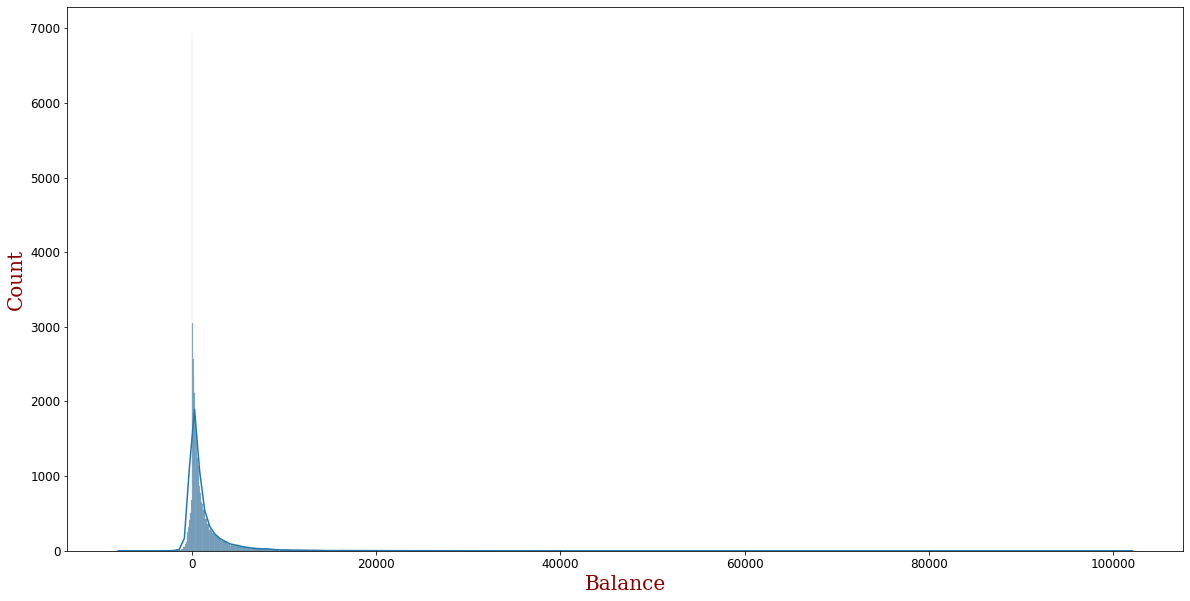

In [348]:
# Plot a histogram to help understand the shapeof the population
# This is not a Gaussian distribution

plt.figure(figsize=(20, 10))
f = sns.histplot(data=np.sort(balance), kde=True)
f.set_xlabel('Balance', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel('Count', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

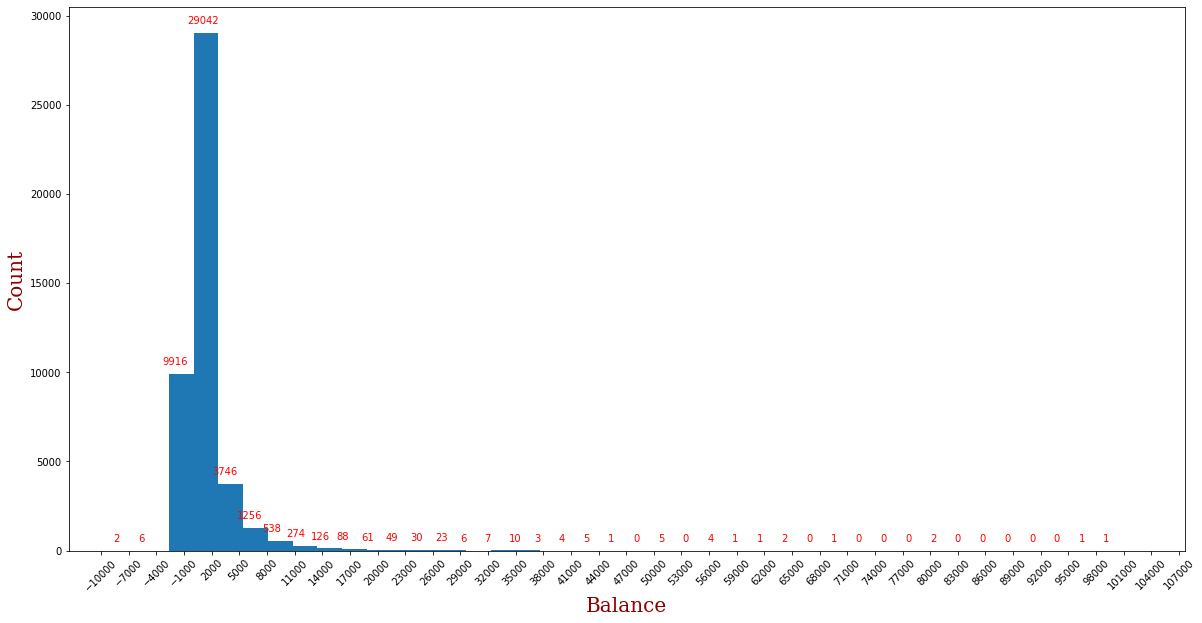

In [349]:
# Zoom in on the data: Use bigger buckets spanning ranges of values

plt.figure(figsize=(20, 10))
counts, _, bars = plt.hist(balance, bins=41)

for bar in bars:
   x = (bar._x0 + bar._x1)/2 - 2000
   y = bar._y1 + 500
   plt.text(x, y, format(bar._y1, '.0f'), c='red')
plt.xlabel('Balance', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
plt.ylabel('Count', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
plt.xticks(np.arange(-10000, 110000, 3000), rotation=45)
plt.show()

In [350]:
# Select 100 samples from this population

samples=np.empty((100, 500))
for i in range(0, 100):
  samples[i] = np.random.choice(balance, size=500)

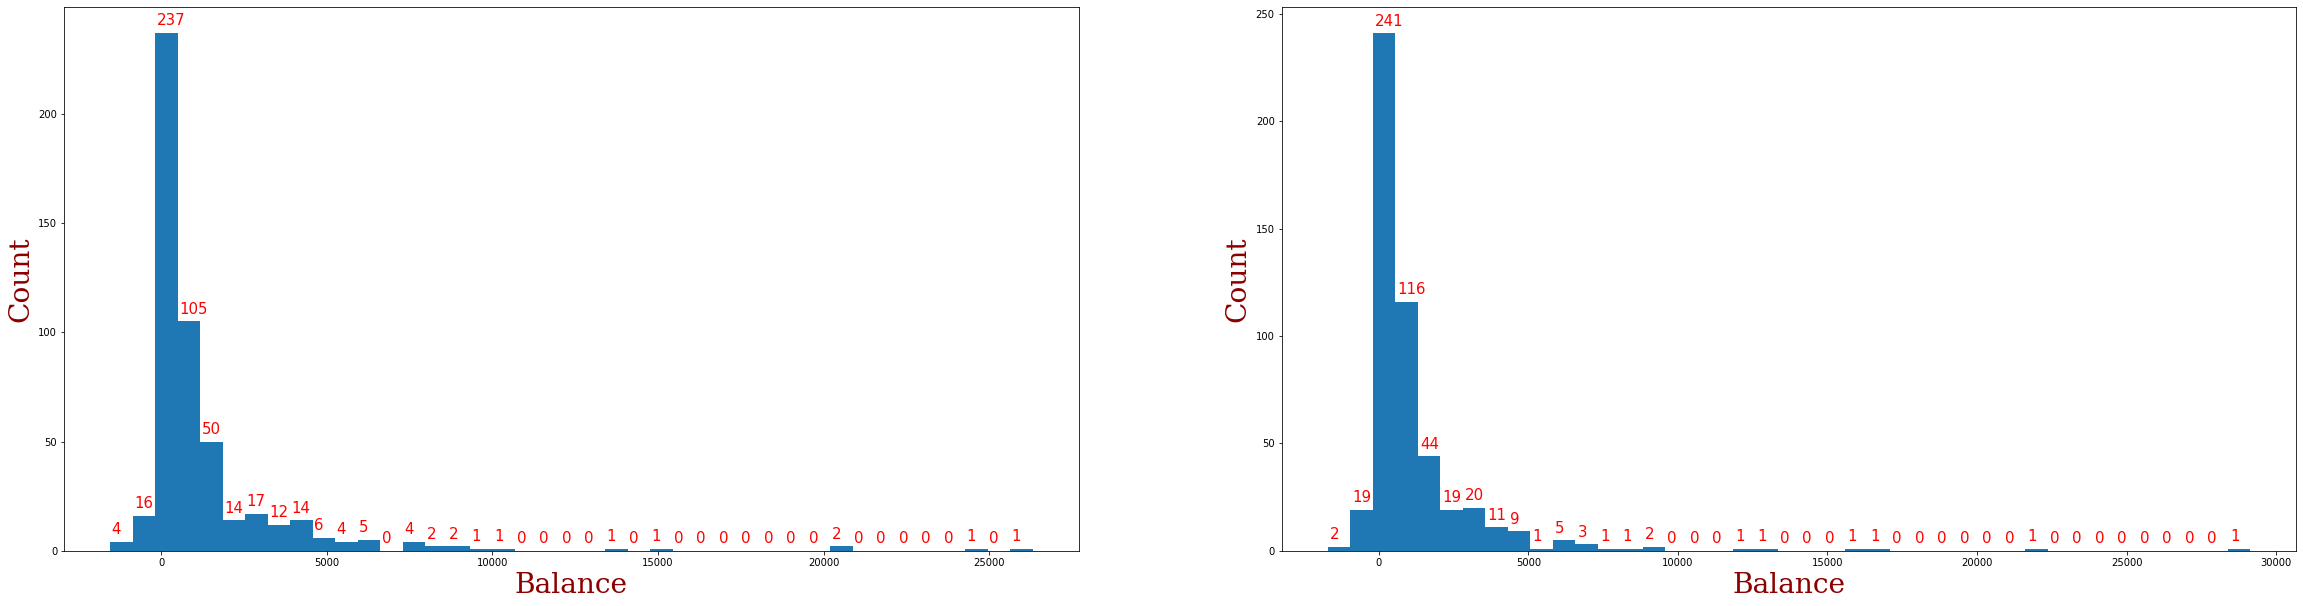

Means: 1306.786, 1194.934

Medians: 472.0, 496.5

Standard Deviations: 2733.0017563485026, 2476.3098646259923



In [352]:
# Plot two of the samples selected at random and show the means, medians, and standard deviations

sample1 = np.random.choice(range(0, 100))
sample2 = np.random.choice(range(0, 100))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 10))
counts, _, bars = ax1.hist(samples[sample1], bins=41)
for bar in bars:
   x = (bar._x0 + bar._x1)/2 - 0.5
   y = bar._y1 + 1.5
   ax1.text(x-300, y+2, format(bar._y1, '.0f'), c='red', fontdict={'fontsize': 15})
ax1.set_xlabel('Balance', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 28})
ax1.set_ylabel('Count', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 28})

counts, _, bars = ax2.hist(samples[sample2], bins=41)
for bar in bars:
   x = (bar._x0 + bar._x1)/2 - 0.5
   y = bar._y1 + 1.5
   ax2.text(x-300, y+2, format(bar._y1, '.0f'), c='red', fontdict={'fontsize': 15})
ax2.set_xlabel('Balance', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 28})
ax2.set_ylabel('Count', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 28})

plt.show()

print(f'Means: {np.mean(samples[sample1])}, {np.mean(samples[sample2])}\n')
print(f'Medians: {np.median(samples[sample1])}, {np.median(samples[sample2])}\n')
print(f'Standard Deviations: {np.std(samples[sample1])}, {np.std(samples[sample2])}\n')

In [353]:
# Calculate the mean for every sample

means = [np.mean(samples[i]) for i in range(0, 100)]
print(means)

[1550.378, 1382.426, 1302.168, 1323.96, 1362.232, 1420.834, 1348.468, 1512.506, 1496.606, 1152.674, 1498.4, 1156.686, 1217.17, 1124.758, 1385.07, 1281.494, 1171.852, 1254.03, 1121.988, 1402.476, 1273.506, 1733.464, 1486.07, 1698.602, 1391.666, 1194.522, 1171.244, 1118.72, 1218.922, 1318.482, 1459.928, 1221.054, 1370.468, 1376.464, 1415.998, 1289.96, 1312.586, 1247.104, 1196.792, 1260.612, 1190.948, 1542.992, 1250.332, 1403.748, 1301.232, 1349.1, 1226.072, 1404.44, 1365.13, 1478.768, 1387.916, 1167.074, 1311.462, 1297.624, 1180.684, 1316.57, 1238.014, 1226.01, 1525.438, 1769.024, 1430.162, 1353.712, 1236.454, 1334.908, 1474.578, 1306.786, 1592.818, 1495.702, 1575.326, 1050.41, 1094.576, 1428.58, 1322.362, 1297.976, 1161.178, 1392.774, 1409.896, 1335.73, 1423.288, 1528.304, 1401.398, 1227.608, 1299.588, 1062.244, 1450.524, 1306.414, 1277.378, 1355.636, 1359.168, 1483.1, 1451.586, 1376.11, 1606.172, 1421.044, 1194.934, 1379.332, 1662.678, 1412.902, 1209.482, 1548.094]


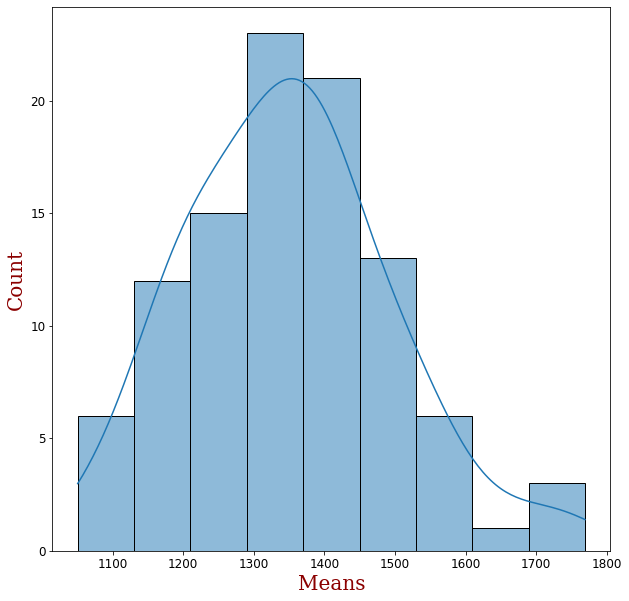

In [354]:
# Plot the means and notice the distribution. 
# According to the Central Limit Theorem the distribution should be close to Gaussian although the original distribution is not

plt.figure(figsize=(10, 10))
f = sns.histplot(means, kde=True)
f.set_xlabel('Means', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel('Count', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()

In [355]:
# Compare the mean of the population against the mean of the means

print(f'Population mean: {np.mean(balance)}\nMean of sample means: {np.mean(means)}')

Population mean: 1362.2720576850766
Mean of sample means: 1348.8582999999999


In [356]:
# Calculate the t-score and p-value of the mean of the means against the population
# Any value for the p-value below 0.05 indicates that the difference in means is statistically significant

from scipy import stats as st

print(st.ttest_1samp(means, np.mean(balance)))

Ttest_1sampResult(statistic=-0.9206570693964096, pvalue=0.3594674977850655)


In [419]:
# Now take 1000 samples from the population

samples=np.empty((1000, 500))
for i in range(0, 1000):
  samples[i] = np.random.choice(balance, size=500)

In [420]:
# Calculate the mean for every sample

means = [np.mean(samples[i]) for i in range(0, 1000)]

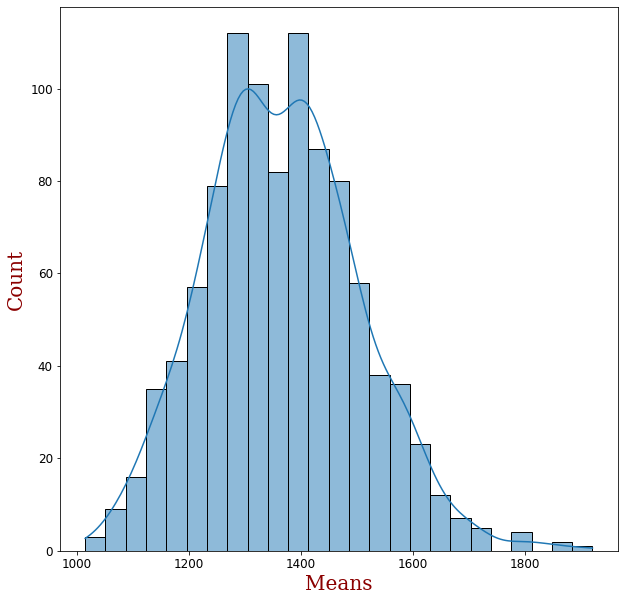

In [379]:
# Plot the means. 
# The distribution should be even closee to Gaussian

plt.figure(figsize=(10, 10))
f = sns.histplot(means, kde=True)
f.set_xlabel('Means', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.set_ylabel('Count', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
f.tick_params(labelsize=12)
plt.show()


In [380]:
# Compare the mean of the means to the mean of the population
# Why is the t-score smaller despite the bigger sample? (hint: Consider the standard error)

print(f'Population mean: {np.mean(balance)}\nMean of sample means: {np.mean(means)}')
print(st.ttest_1samp(means, np.mean(balance)))

Population mean: 1362.2720576850766
Mean of sample means: 1366.616094
Ttest_1sampResult(statistic=0.995739558311619, pvalue=0.3196178228972025)


In [414]:
# Analyze the sample means by computing the Z-score relative to the normalized population
# How many standard deviations is the mean of the sample means from the mean of the population? What does this signify?

sigma = np.std(balance)
mu = np.mean(balance)
x_bar = np.mean(samples)

z_score = (x_bar-mu)/sigma
print(z_score)

6.897119002068147


In [415]:
# Find the p-value for this Z-score
# Note: Multiply by two because this is a two-tailed test

print(f'p-value is {st.norm.sf(abs(z_score)) * 2}')

p-value is 5.306772680587337e-12


In [425]:
# 'Spike' a few of the samples to give us some questionable data

samples[0] = -999999.99
samples[100] = -9999999.9
samples[500] = -9999999.9

In [426]:
# Find the Z-scores and p-values for the mean of each sample

scores=np.empty((2, 1000))
for i in range(0, 1000):
  scores[0, i] = (np.mean(samples[i])-mu)/sigma
  scores[1, i] = st.norm.sf(abs(scores[0, i])) * 2

In [427]:
# Find any samples with a p-value that is statistically significant
# These are dodgy samples that should be discarded!

threshold = 0.05
print(np.where(scores[1, :] < threshold))

(array([  0, 100, 500]),)


# Conclusion:

The more samples you take from a population, the closer the aggregated mean of these samples is to the mean of the population.

Beware of using the t-test to compare samples with a size bigger than 30 due to the standard error. Calculate the Z-score instead.